In [1]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.utils import shuffle
import keras
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers

Using TensorFlow backend.


In [15]:
shots = pd.read_csv('./shot_logs_assignment.csv')
# Feature engineering

one_hot_player_pos = pd.get_dummies(shots["Player_Pos"])
one_hot_def_pos = pd.get_dummies(shots["Defender_Pos"])
location_feature = list(shots.LOCATION.apply(lambda x: 0 if x == "A" else 1))
game_result_feature = list(shots.W.apply(lambda x: 1 if x == "W" else 0))
pts_feature = list(shots.PTS_TYPE.apply(lambda x: 1 if x == 3 else 0))
# shots["Height_Diff"] - Not used since some 0 values causes outliers.
# pts_in_game upto that shot
game_clock_feature = list(shots.GAME_CLOCK.apply(lambda x: int(x.strip().split(":")[0])*60 + int(x.strip().split(":")[1])))
features = np.column_stack([location_feature, game_result_feature, shots["PERIOD"], shots["DRIBBLES"],\
                            shots["SHOT_NUMBER"], shots["SHOT_DIST"], shots["TOUCH_TIME"], pts_feature,\
                            game_clock_feature, shots["CLOSE_DEF_DIST"], \
                            one_hot_player_pos, one_hot_def_pos])
labels = list(shots.SHOT_RESULT.apply(lambda x: 0 if x == "missed" else 1))

x_train = features[:120000]
y_train = labels[:120000]
x_test  = features[120000:]
y_test = labels[120000:]

In [32]:
# define the keras model
from keras.regularizers import l2

model = Sequential()

#good 0.00001
model.add(Dense(10, input_dim=22, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(50, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile model
#regulariser

#sgd = optimizers.SGD(lr=0.000001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#Fit model #1000 epochs
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2,verbose=1)

Train on 96000 samples, validate on 24000 samples
Epoch 1/100
96000/96000 [==============================] - 3s 28us/step - loss: 0.7242 - accuracy: 0.5798 - val_loss: 0.6856 - val_accuracy: 0.5927
Epoch 2/100
96000/96000 [==============================] - 3s 26us/step - loss: 0.6681 - accuracy: 0.5967 - val_loss: 0.6602 - val_accuracy: 0.6089
Epoch 3/100
96000/96000 [==============================] - 3s 26us/step - loss: 0.6633 - accuracy: 0.6033 - val_loss: 0.6589 - val_accuracy: 0.6028
Epoch 4/100
96000/96000 [==============================] - 3s 26us/step - loss: 0.6607 - accuracy: 0.6059 - val_loss: 0.6569 - val_accuracy: 0.6113
Epoch 5/100
96000/96000 [==============================] - 3s 26us/step - loss: 0.6595 - accuracy: 0.6078 - val_loss: 0.6563 - val_accuracy: 0.6104
Epoch 6/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6577 - accuracy: 0.6114 - val_loss: 0.6549 - val_accuracy: 0.6129
Epoch 7/100
96000/96000 [==============================] - 3s 

Epoch 56/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6498 - accuracy: 0.6190 - val_loss: 0.6529 - val_accuracy: 0.6158
Epoch 57/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6498 - accuracy: 0.6197 - val_loss: 0.6538 - val_accuracy: 0.6144
Epoch 58/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6498 - accuracy: 0.6198 - val_loss: 0.6558 - val_accuracy: 0.6110
Epoch 59/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6496 - accuracy: 0.6195 - val_loss: 0.6514 - val_accuracy: 0.6152
Epoch 60/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6495 - accuracy: 0.6200 - val_loss: 0.6536 - val_accuracy: 0.6137
Epoch 61/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6498 - accuracy: 0.6203 - val_loss: 0.6521 - val_accuracy: 0.6155
Epoch 62/100
96000/96000 [==============================] - 3s 27us/step - loss: 0.6496 - accuracy: 0.6204

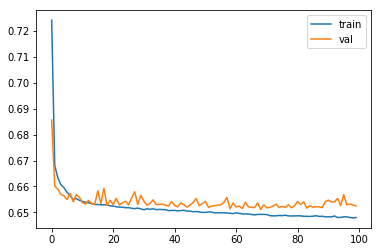

Test Accuracy: 62.41


In [35]:
#Plot
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

#Print Accuracy
_, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.2f' % (accuracy*100))

#X1 = test[100000:]
#y1 = pd.DataFrame([int(i) for i in (encoded_Shot_made.iloc[:,1])][100000:])
#pred1 = model.predict_classes(X1)
#sum(pred1)

In [13]:
df = pd.read_csv("shot_logs_assignment.csv")

df = pd.DataFrame(df)
df = shuffle(df)
#Convert to numeric

df = df.assign(
    Shot_made = lambda dataframe: dataframe['SHOT_RESULT'].map(lambda SHOT_RESULT: 1 if SHOT_RESULT == "made" else 0),
    Is_Loc_A = lambda dataframe: dataframe['LOCATION'].map(lambda LOCATION: 1 if LOCATION == "A" else 0)
)

df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,Defender_Height,Height_Diff,Player_Weight,Defender_Weight,Player_Age,Defender_Age,Player_Pos,Defender_Pos,Is_Loc_A,Shot_made
85065,21400451,"DEC 27, 2014 - NYK @ SAC",A,L,-6,23,4,2:01,10.5,0,...,200.0,0.0,108.00,103.50,31,29,SF,SF,1,1
6969,21400192,"NOV 22, 2014 - UTA vs. NOP",H,L,-12,12,4,1:32,19.9,0,...,205.0,0.0,119.25,108.00,24,27,PF,PF,0,0
36021,21400503,"JAN 04, 2015 - DAL @ CLE",A,W,19,14,3,6:12,21.3,0,...,195.0,-195.0,0.00,98.55,0,24,0,SG,1,1
122171,21400351,"DEC 14, 2014 - MIN vs. LAL",H,L,-6,4,2,7:13,10.2,1,...,187.5,5.0,85.05,90.00,20,27,PG,PG,0,0
60183,21400249,"DEC 01, 2014 - SAS @ PHI",A,W,6,9,2,0:13,6.8,0,...,200.0,5.0,117.00,94.50,29,21,C,SF,1,0


In [3]:
#One hot for categorical

#encoded_playerid = pd.DataFrame(to_categorical(df['player_id']))
encoded_Player_Age = pd.DataFrame(to_categorical(df['Player_Age']))
#encoded_Player_Pos = pd.DataFrame(to_categorical(df['Player_Pos']))
encoded_Defender_Age = pd.DataFrame(to_categorical(df['Defender_Age']))
#encoded_Defender_Pos = pd.DataFrame(to_categorical(df['Defender_Pos']))
#encoded_CLOSEST_DEFENDER_PLAYER_ID = pd.DataFrame(to_categorical(df['CLOSEST_DEFENDER_PLAYER_ID']))
encoded_Period = pd.DataFrame(to_categorical(df['PERIOD']))
encoded_Is_Loc_A = pd.DataFrame(to_categorical(df['Is_Loc_A']))
encoded_SHOT_NUMBER = pd.DataFrame(to_categorical(df['SHOT_NUMBER']))

#Y One hot
encoded_Shot_made = pd.DataFrame(to_categorical(df['Shot_made']))


len(encoded_Player_Age.iloc[0,])
len(encoded_Shot_made.iloc[0,])

#Join to test

test = encoded_Player_Age.join(encoded_Defender_Age,lsuffix='_left', rsuffix='_right')
#test = test.join(encoded_CLOSEST_DEFENDER_PLAYER_ID,lsuffix='_left', rsuffix='_right')
test = test.join(encoded_Period,lsuffix='_left', rsuffix='_right')
test = test.join(encoded_Is_Loc_A,lsuffix='_left', rsuffix='_right')
test = test.join(encoded_SHOT_NUMBER,lsuffix='_left', rsuffix='_right')
test = test.join(df['CLOSEST_DEFENDER_PLAYER_ID'])
test = test.join(df['player_id'])



test.head()


,0_left,1_left,2_left,3_left,4_left,5_left,6_left,7_left,8_left,9_left,...,31,32,33,34,35,36,37,38,CLOSEST_DEFENDER_PLAYER_ID,player_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101187,203148
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202711,203148
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202711,203148
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203900,203148
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201152,203148


In [4]:

#Normalise numeric vectors
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized_FGM = scaler.fit_transform(np.array(df['FGM']).reshape(-1, 1))
normalized_DRIBBLES = scaler.fit_transform(np.array(df['DRIBBLES']).reshape(-1, 1))
normalized_TOUCH_TIME = scaler.fit_transform(np.array(df['TOUCH_TIME']).reshape(-1, 1))
normalized_SHOT_DIST = scaler.fit_transform(np.array(df['SHOT_DIST']).reshape(-1, 1))
normalized_CLOSE_DEF_DIST = scaler.fit_transform(np.array(df['CLOSE_DEF_DIST']).reshape(-1, 1))
normalized_PTS = scaler.fit_transform(np.array(df['PTS']).reshape(-1, 1))
normalized_Player_Height = scaler.fit_transform(np.array(df['Player_Height']).reshape(-1, 1))
normalized_Defender_Height = scaler.fit_transform(np.array(df['Defender_Height']).reshape(-1, 1))
normalized_Height_Diff = scaler.fit_transform(np.array(df['Height_Diff']).reshape(-1, 1))
normalized_Player_Weight = scaler.fit_transform(np.array(df['Player_Weight']).reshape(-1, 1))
normalized_Defender_Weight = scaler.fit_transform(np.array(df['Defender_Weight']).reshape(-1, 1))

#Join to test

test = test.join(pd.DataFrame(normalized_FGM),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_DRIBBLES),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_TOUCH_TIME),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_SHOT_DIST),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_CLOSE_DEF_DIST),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_PTS),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_Player_Height),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_Defender_Height),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_Height_Diff),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_Player_Weight),lsuffix='_left', rsuffix='_right')
test = test.join(pd.DataFrame(normalized_Defender_Weight),lsuffix='_left', rsuffix='_right')

#Split Response and feature
X = test[:100000]
y = pd.DataFrame([int(i) for i in (encoded_Shot_made.iloc[:,1])][:100000])
sum(y)

0

In [6]:

# define the keras model
from keras.regularizers import l2

model = Sequential()

#good 0.00001
model.add(Dense(16, input_dim=137, activation='relu', kernel_regularizer=l2(0.0001)))
#model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.00001)))
#model.add(Dense(50, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile model
#regulariser

#sgd = optimizers.SGD(lr=0.000001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#Fit model #1000 epochs
history = model.fit(X, y, epochs=10, validation_split=0.2,verbose=1)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 2s 31us/step - loss: 106.0229 - accuracy: 0.5164 - val_loss: 30.4089 - val_accuracy: 0.5536
Epoch 2/10
80000/80000 [==============================] - 2s 28us/step - loss: 65.3722 - accuracy: 0.5354 - val_loss: 35.3510 - val_accuracy: 0.5686
Epoch 3/10
80000/80000 [==============================] - 2s 28us/step - loss: 58.9162 - accuracy: 0.5530 - val_loss: 129.0144 - val_accuracy: 0.5753
Epoch 4/10
80000/80000 [==============================] - 2s 28us/step - loss: 48.1749 - accuracy: 0.5770 - val_loss: 58.4420 - val_accuracy: 0.5753
Epoch 5/10
80000/80000 [==============================] - 2s 28us/step - loss: 41.1197 - accuracy: 0.6022 - val_loss: 9.5099 - val_accuracy: 0.5903
Epoch 6/10
80000/80000 [==============================] - 2s 30us/step - loss: 42.1640 - accuracy: 0.6190 - val_loss: 33.4148 - val_accuracy: 0.6101
Epoch 7/10
80000/80000 [==============================]

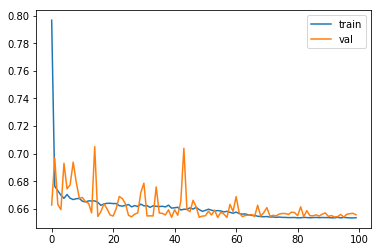

ValueError: Error when checking input: expected dense_11_input to have shape (22,) but got array with shape (137,)

In [19]:
#Plot
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

#Print Accuracy
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

X1 = test[100000:]
y1 = pd.DataFrame([int(i) for i in (encoded_Shot_made.iloc[:,1])][100000:])
pred1 = model.predict_classes(X1)
sum(pred1)

In [10]:
confusion_matrix(y1,pred1)

array([[15099,   230],
       [ 7503,  5237]])

In [12]:
sum(y)/len(df)

0.0